<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Introducción matemática.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Estadística y Contrastes de Hipótesis.</h2></font> 

#### Antonio José Serrano López

En este curso, se introducirán nociones de estadística así como los estadísticos clásicos y robustos más utilizados, así como los contrastes de hipótesis y su importancia dentro de la Ciencia de Datos. Comenzaremos con el repaso de la distribución normal y su relación con el valor medio mediante la ley de los grandes números y el teorema del límite central. 
Los intervalos de confianza darán paso al concepto de contraste de hipótesis, variantes y posibles aplicaciones. Compararemos los conceptos de  significancia y tamaño del efecto. Y terminaremos repasando los contrastes más utilizados: pruebas de normalidad (Kolmogorov-Smirnov y Shapiro-Wilk), pruebas paramétricas (comparación de medias, t-student y ANOVA), pruebas no paramédicas (Mann-Whitney, Wilcoxon Signed-Rank, Kruskal-Wallis y Friedman) y pruebas de relación o asociación (correlación y Chi2)

In [2]:
#https://pingouin-stats.org/build/html/index.html
#%conda install -c conda-forge pingouin
#%pip install pingouin

In [3]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
from scipy.stats import norm
import statsmodels.api as sm 
import pandas as pd # importando pandas
import seaborn as sns # importando seaborn
import matplotlib.pyplot as plt # importando pyplot
#import pingouin as pg 

# Estadísticos

Queremos describir/resumir los datos en valores que muestren alguna carácterística interesante para nosotros. La expresión matemática que la obtiene se denominia estadístico (porque se aplica sobre datos).

In [4]:
edades_familia=[3,3,7,32,33]
salarios_departamento=[300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900]

## Estadísticos clásicos

In [5]:
datos=edades_familia
stats.describe(datos)

DescribeResult(nobs=5, minmax=(3, 33), mean=15.6, variance=240.79999999999995, skewness=0.3771611176977245, kurtosis=-1.8149735861083212)

In [6]:
datos=salarios_departamento
stats.describe(datos)

DescribeResult(nobs=12, minmax=(300, 8900), mean=2125.0, variance=5232954.545454545, skewness=2.3736395330661284, kurtosis=4.707881972222517)

#### **[Ejercicio] Obtén los estadísticos de stats.describe**

Utilizando funciones de:

* numpy 
https://numpy.org/doc/stable/reference/routines.statistics.html

* stats 
https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics


In [7]:
#solucion
datos=salarios_departamento
print(f"nobs={len(datos)}") #fstring --> f"" -texto-> f"nobs=" -> f"nobs={valor}"
print(f"minmax={(np.min(datos),np.max(datos))}")
print(f"mean={np.mean(datos)}")
print(f"std={np.mean(datos)}")
print(f"var={np.var(datos,ddof=1)}")
print(f"skewness={stats.skew(datos)}")
print(f"kurtosis={stats.kurtosis(datos)}")

nobs=12
minmax=(300, 8900)
mean=2125.0
std=2125.0
var=5232954.545454546
skewness=2.3736395330661284
kurtosis=4.707881972222517


#### **[Ejercicio] Compara la media y la media truncada a 900 y 6000**

In [8]:
salarios_departamento=[300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900]
datos=salarios_departamento
#solucion
np.mean(datos),stats.tmean(datos,limits=(900,6000)),stats.trim_mean(datos,proportiontocut=0.1)

(2125.0, 1630.0, 1630.0)

## Estadísticos robustos

#### **[Ejercicio] Obtén la mediana y el rango intercuartil. Compara los resultados con loe estadísticos robustos**

In [9]:
datos=salarios_departamento
#solucion centralidad
np.median(datos),np.mean(datos),stats.trim_mean(datos,proportiontocut=0.1)

(1350.0, 2125.0, 1630.0)

In [10]:
#solucion dispersión
np.std(datos),stats.iqr(datos) #Q75-Q25 (50% valores)

(2190.176933491904, 1250.0)

## Otros estadísticos interesantes

#### **[Ejercicio] Investiga qué hacen los siguientes estadísticos**

https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics

In [11]:
stats.variation(datos) 
#solution
#coeficiente de varianza = std/mean
edades_familia=[3,3,7,32,33]
salarios_departamento=[300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900]
stats.variation(salarios_departamento),stats.variation(edades_familia)

(1.0306714981138372, 0.8897103370716652)

In [12]:
salarios_departamento=[300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900]
datos=salarios_departamento
stats.rankdata(datos)
#solution
#orden (rank) de los datos

array([ 1. ,  3. ,  3. ,  3. ,  5.5,  5.5,  7. ,  8. ,  9. , 10. , 11. ,
       12. ])

In [13]:
stats.hmean(datos)
#solution
#media armónica // F1-Score -> 1/sum(1/xi)

1105.4242362950504

In [14]:
stats.median_abs_deviation(datos)
#solucion
# Median absolute deviation MAD= median(x-median(x))
np.std(datos),stats.iqr(datos),stats.median_abs_deviation(datos)

(2190.176933491904, 1250.0, 450.0)

# Distribución de probabilidad Normal

Densidad de probabilidad de una distribución $N(\mu,\sigma)$

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


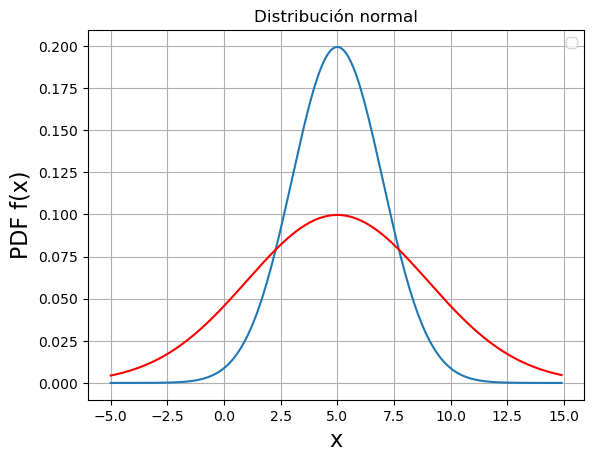

In [15]:
#https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
mu = 5
sigma = 2
y = stats.norm(loc=mu, scale=sigma).pdf(x)
plt.plot(x,y)
y2 = stats.norm(mu, 2*sigma).pdf(x)
plt.plot(x,y2,'r')
plt.title('Distribución normal')
plt.xlabel("x",fontsize=16)
plt.ylabel("PDF f(x)",fontsize=16)
plt.legend()
plt.grid()
plt.show()

#### **[Ejercicio] Distribución normal estándard**

Representa la distribución Z, es decir, N(0,1)

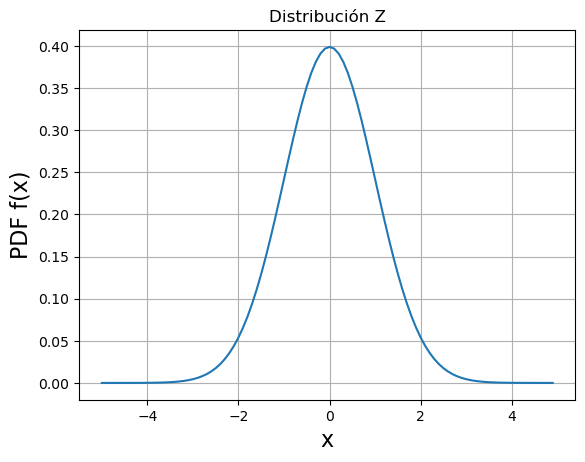

In [16]:
#solucion
x = np.arange(-5,5,0.1)
mu = 0
sigma = 1
y = stats.norm(loc=mu, scale=sigma).pdf(x)
plt.plot(x,y)
plt.title('Distribución Z')
plt.xlabel("x",fontsize=16)
plt.ylabel("PDF f(x)",fontsize=16)
plt.grid()
plt.show()

## Cumulative distribution function (CDF)

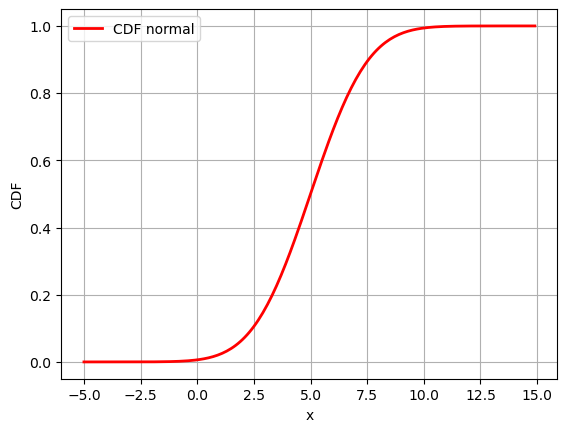

In [17]:
#PDF F(x)=P(X=x) 
#CDF F(x)=P(X<=x)=q (q son quantiles)
x = np.arange(-5,15,0.1)
mu = 5
sigma = 2
plt.plot(x, stats.norm.cdf(x, mu, sigma), 'r',linewidth=2, label='CDF normal')
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

## Percent point function

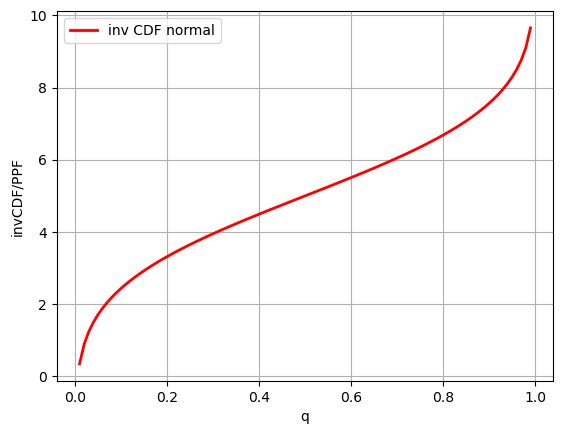

In [18]:
#inv(CDF) F^(-1)(q)=x, ppf ->Percent point function (inverse of cdf — percentiles).
x = np.arange(0,1,0.01)
plt.plot(x, stats.norm.ppf(x, mu, sigma), linewidth=2, color='r', label='inv CDF normal')
plt.xlabel("q")
plt.ylabel("invCDF/PPF")
plt.legend()
plt.grid()
plt.show()

#### **[Ejercicio] Vida media de una bombilla**

Sabiendo que una bombilla tiene una vida media de 10000 horas con una desviación de 500 horas. Asumiendo una distribución normal, determina: 
* Probabilidad de que una bombilla se rompa antes de 500 horas. 
* Probabilidad de que una bombilla se rompa después de 20000 horas. 
* Valor en horas mínimo que garantiza que funcionan el 50% de las bombillas
* Valor en horas mínimo que garantiza que funcionan el 99% de las bombillas

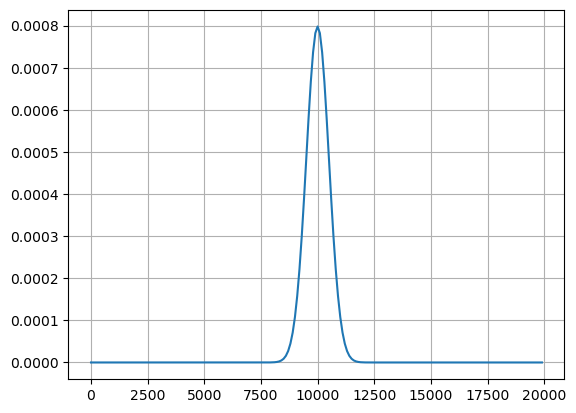

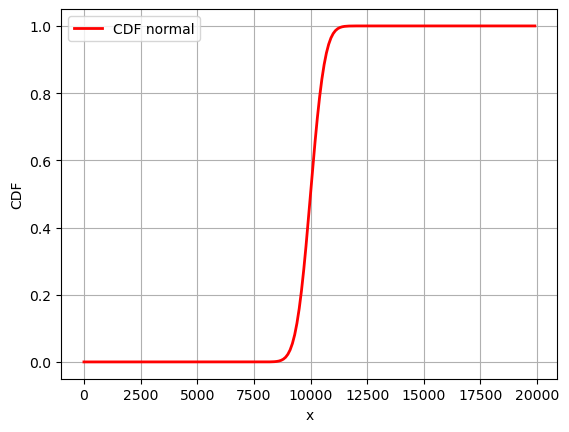

In [19]:
mu=10000
sigma=500

x = np.arange(0,20000,100)
y = stats.norm.pdf(x,mu, sigma)
plt.plot(x,y)
plt.grid()
plt.show()

plt.plot(x, norm.cdf(x, mu, sigma), linewidth=2, color='r', label='CDF normal')
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

In [20]:
# solucion
#N(mu,sigma)
mu=10000
sigma=500
#Probabilidad de que una bombilla se rompa antes de 500 horas.
#PDF, CDF, PPF
#P(X<=500)
print(f"P(X<=500)={stats.norm.cdf(x=500,loc=mu,scale=sigma):2.2e}")
#Probabilidad de que una bombilla se rompa después de 20000 horas.
#P(X>20000)=1-P(X<=20000)
print(f"P(X>20000)={1-stats.norm.cdf(x=20000,loc=mu,scale=sigma):2.2e}")
#Valor en horas mínimo que garantiza que funcionan el 50% de las bombillas
#PPF -> inv CDF P(X<=¿x?)=q->q=1-0.5
print(f"P(X<=¿x?)=1-0.5={stats.norm.ppf(q=1-0.5,loc=mu,scale=sigma):2.2f}")
#Valor en horas mínimo que garantiza que funcionan el 99% de las bombillas
print(f"P(X<=¿x?)=0.01={stats.norm.ppf(q=0.01,loc=mu,scale=sigma):2.2f}")

P(X<=500)=8.53e-81
P(X>20000)=0.00e+00
P(X<=¿x?)=1-0.5=10000.00
P(X<=¿x?)=0.01=8836.83


## Distribuciones a partir de la normal

Distribución Chi-Cuadrado $\chi^2_{df}$ 

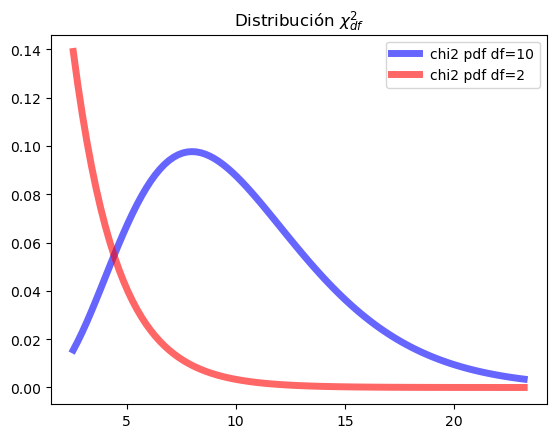

In [21]:
# chi2
df = 10
x = np.linspace(stats.chi2.ppf(0.01, df),stats.chi2.ppf(0.99, df), 100)
plt.plot(x, stats.chi2.pdf(x, df),'b-', lw=5, alpha=0.6, label='chi2 pdf df=10')
df = 2
plt.plot(x, stats.chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf df=2')
plt.legend()
plt.title("Distribución $\chi^2_{df}$")
plt.show()

#mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk')
#print(mean, var, skew, kurt)

Distribución t-student $t_{df}$

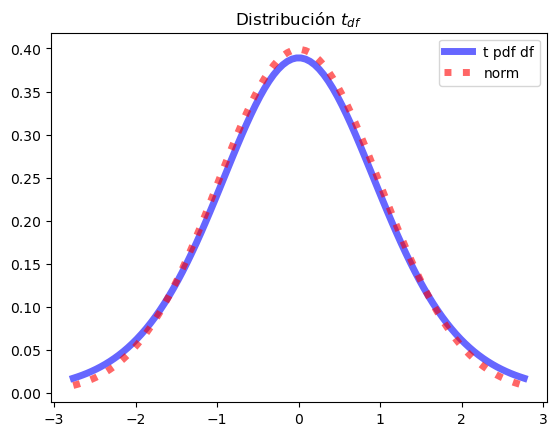

In [22]:
# t-student
df=10
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
plt.plot(x, stats.t.pdf(x, df),'b-', lw=5, alpha=0.6, label='t pdf df')
plt.plot(x, stats.norm.pdf(x),'r:', lw=5, alpha=0.6, label='norm')
plt.legend()
plt.title("Distribución $t_{df}$")
plt.show()

Distribución F, $F_{dfn,dfd}$

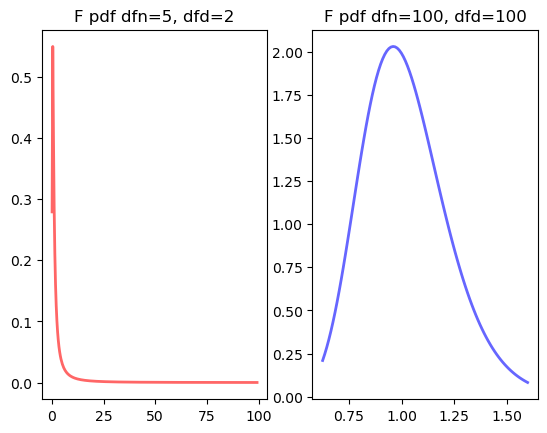

In [23]:
# F
fig, ax = plt.subplots(1, 2)
#plt.title("Distribución $F_{dfn,dfd}$")
dfn, dfd = 5,2
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 300)
ax[0].plot(x, stats.f.pdf(x, dfn, dfd),'r-', lw=2, alpha=0.6, label='F pdf dfn=5, dfd=2')
ax[0].set_title('F pdf dfn=5, dfd=2')
#plt.show()
dfn, dfd = 100,100
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 100)
ax[1].plot(x, stats.f.pdf(x, dfn, dfd),'b-', lw=2, alpha=0.6, label='F pdf dfn=100, dfd=100')
ax[1].set_title('F pdf dfn=100, dfd=100')

plt.show()

## Población y muestra


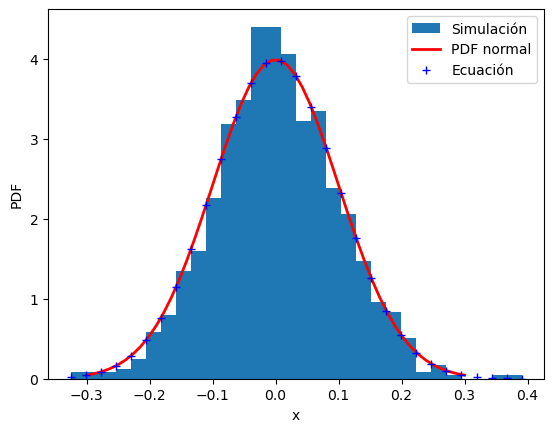

In [24]:
from scipy.stats import norm

mu, sigma = 0, 0.1 # media y desviación estándar
size=1000
#s = np.random.default_rng().normal(mu, sigma, size)
s= stats.norm.rvs(mu, sigma, size)
#histogram
count, bins, ignored = plt.hist(s, 30, density=True, label='Simulación')
#pdf
x = np.linspace(mu-3*sigma, mu+3*sigma)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, color='r', label='PDF normal')
#equation
normal = plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),'+',color='b', label='Ecuación')

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.show()

#### **[Ejercicio] Ley de los grandes números**
Comprueba que conforme aumentas el número de valores de x, el promedio tiende al valor esperado

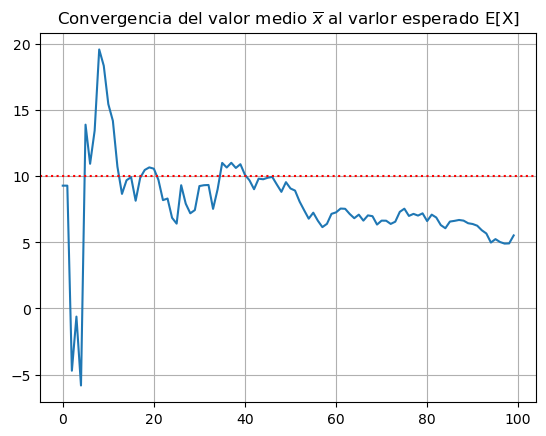

In [25]:
mu, sigma = 10, 30 # media y desviación estándar
size=100
x=stats.norm.rvs(mu, sigma, size) #Random variates.
x[0] #primer valor   
x[0:5] #primeros valores

#solución
x_mean=np.zeros(size) #definir el tamaño del x_mean
x_mean[0]=x[0] #inicialización
for i in range(1,size): #bucle i desde 2 hasta size
    x_mean[i]=np.mean(x[0:i]) # x_mean[i] se calcula con la media de las i primeras muestras

#dibujamos x_mean
plt.plot(x_mean)
plt.axhline(y=mu,color="r",linestyle=":")
plt.title("Convergencia del valor medio $\overline{x}$ al varlor esperado E[X]")
plt.grid()
plt.show()


## Teorema del límite central


#### **[Ejercicio] Distribución del valor medio**

Queremos obtener la distribución del valor medio del nivel de hemoglobina en sangre de la población mundial. 
* De una variable *hb* aleatoria normal obtén 10 valores de media 10 g/dl y una desviación de 2 g/dl. 
* Calcula el valor medio y almacena el resultado en hb_media.
* Repite el proceso r=100 veces. 
* Determina el valor medio de hb_media ¿qué valor tiene?
* Determina la desviación estándar de hb_media ¿qué valor tiene? ¿varia con r? 

Valor medio calculado de hb_media:9.99 desviación estándard 0.63)
Valor medio teórico de hb_media:10.00 desviación estándard 0.63)


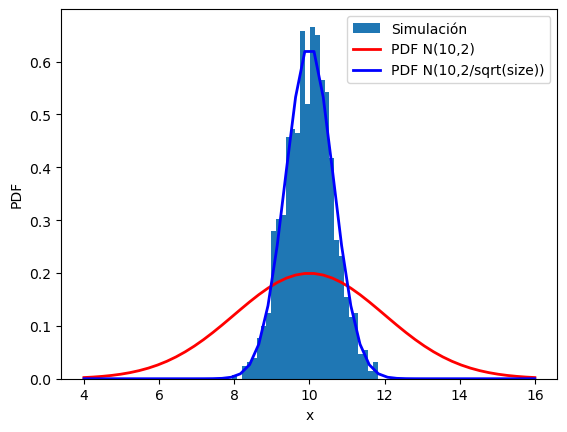

In [26]:
#solución
m=10
sigma=2
r=1000
size=10
x_mean_mean=np.zeros(r)
for i in range(0,r): #para evitar el warning del mean
    x=stats.norm.rvs(mu,sigma,size)
    #x=stats.poisson.rvs(mu,size=size) #rvs(mu, loc=0, size=1, random_state=None)
    x_mean_mean[i]=np.mean(x)

print(f"Valor medio calculado de hb_media:{np.mean(x_mean_mean):.2f} desviación estándard {np.std(x_mean_mean):.2f})")
print(f"Valor medio teórico de hb_media:{m:.2f} desviación estándard {sigma/np.sqrt(size):.2f})")

#extra 
#hist
count, bins, ignored = plt.hist(x_mean_mean, 30, density=True, label='Simulación')
#pdf
x = np.linspace(mu-3*sigma, mu+3*sigma)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, color='r', label='PDF N(10,2)')
plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(size)), linewidth=2, color='b', label='PDF N(10,2/sqrt(size))')
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.show()

# Contraste de Hipótesis

#### **[Ejercicio] Motivación**

Para zanjar una disputa, vamos a ayudar a confirmar o desmentir que una de las personas sea mejor que la otra (a la vista de los demás). Determina algunos estadísticos que te aporten información (media, desviación estándar, PDF). 

In [27]:
Kim=[53,57,58,66,85,67,67,68,69,70,70,80]
Sarah=[70,70,70,72,73,75,75,76,76,78,79,81]
votaciones = pd.DataFrame({'Kim': Kim, 
                           'Sarah': Sarah})
votaciones.head(5)
#solucion
mKim=np.mean(Kim)
mSarah=np.mean(Sarah)
mKim,mSarah

(67.5, 74.58333333333333)

In [28]:
sKim=np.std(Kim)
sSarah=np.std(Sarah)
sKim,sSarah

(8.616843969807043, 3.522743564641375)

In [29]:
print(f"Sarah={mSarah:2.2f}+-{sSarah:2.2f}")
print(f"Kim={mKim:2.2f}+-{sKim:2.2f}")

Sarah=74.58+-3.52
Kim=67.50+-8.62


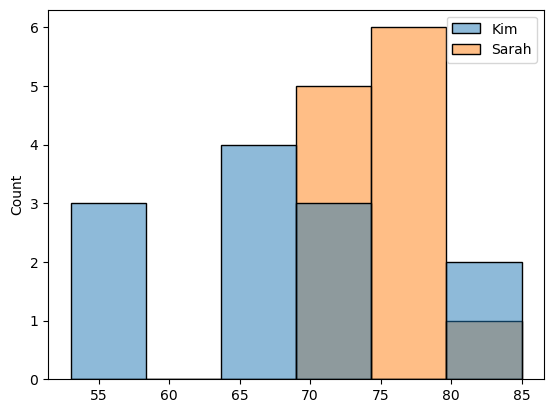

In [30]:
sns.histplot(votaciones)
plt.show()

## Valores críticos



#### **[Ejercicio] Determina los valores de $z_{\alpha}$. También $z_{\alpha/2}$ y $z_{1-\alpha/2}$**

In [31]:
alpha=0.05 #area de la pdf -> probabilidad 
#solucion,
#N(0,1)=Z
z_alpha=norm.ppf(1-alpha,0,1)
z_alpha
z_alpha_2=norm.ppf(1-alpha/2,0,1)
z_alpha_2
#1.959963984540054

1.959963984540054

## Intervalo de confianza

#### **[Ejercicio] Determina el intervalo de confianza de la media**

Determina el intervalo de confianza al 99% de cada una de las votaciones. 

In [32]:
confianza=99/100
alpha=(1-confianza)
z_alpha_2=norm.ppf(1-alpha/2,0,1)
print(z_alpha_2)
n=len(Kim)
#solucion
print("Estadísticos de los datos")
print(f"Sarah={mSarah:2.2f}+-{sSarah:2.2f}")
print(f"Kim={mKim:2.2f}+-{sKim:2.2f}")
print("Estadísticos del valor medio")
print(f"Sarah={mSarah:2.2f}+-{z_alpha_2/np.sqrt(n)*sSarah:2.2f}")
print(f"Kim={mKim:2.2f}+-{z_alpha_2/np.sqrt(n)*sKim:2.2f}")

2.5758293035489004
Estadísticos de los datos
Sarah=74.58+-3.52
Kim=67.50+-8.62
Estadísticos del valor medio
Sarah=74.58+-2.62
Kim=67.50+-6.41


In [34]:
Sarah_sup=mSarah+z_alpha_2/np.sqrt(n)*sSarah
Sarah_inf=mSarah-z_alpha_2/np.sqrt(n)*sSarah
print(f"Sarah=({Sarah_inf:2.2f},{Sarah_sup:2.2f})")
Kim_sup=mKim+z_alpha_2/np.sqrt(n)*sKim
Kim_inf=mKim-z_alpha_2/np.sqrt(n)*sKim
print(f"Kim=({Kim_inf:2.2f},{Kim_sup:2.2f})")

Sarah=(71.96,77.20)
Kim=(61.09,73.91)


#### **[Ejercicio] Determina el intervalo de confianza al 99% de una proporción**

Se realizan 10 pruebas PCR por cada una de las 50 provincias y se registran los resultados. Suponiendo 47 millones de personas ¿cuántas podrían estar infectadas?

In [52]:
#https://www.statsmodels.org/stable/stats.html
nPCR_positiva=np.array([4,6,4,5,0,7,1,1,1,4,6,0,3,1,2,5,5,2,4,5,1,2,3,4,1,2,4,0,3,0,3,3,5,5,4,3,6,2,3,6,3,0,2,6,5,0,3,1,2,1])
nPCR_por_provincia=10
n_provincias=50

#solucion
n=47e+6
count=np.sum(nPCR_positiva)
nobs=(n_provincias*nPCR_por_provincia)
import statsmodels.stats as sms #statsmodels.stats.proportion.proportion_confint
sms.proportion.proportion_confint(count=count,nobs=nobs,alpha=0.01)
#p=X/n-> p*n=X
(ci_low,ci_upp)=sms.proportion.proportion_confint(count=count,nobs=nobs,alpha=0.01)
print("población infectada al 99 por ciento (%1.3f,%1.3f) " % (ci_low*n, ci_upp*n))
#(ci_low*n,ci_upp*n)
(ci_low_ac,ci_upp_ac)=sms.proportion.proportion_confint(count=count,nobs=nobs,alpha=0.01,method="agresti_coull")
print("población infectada al 99 por ciento (%1.3f,%1.3f) con corrección de agresti_coull " % (ci_low_ac*n, ci_upp_ac*n))
#(ci_low,ci_upp,ci_low_ac,ci_upp_ac)

población infectada al 99 por ciento (11529680.809,16482319.191) 
población infectada al 99 por ciento (11664047.837,16596619.235) con corrección de agresti_coull 


In [54]:
sms.proportion.proportion_confint(count=count,nobs=nobs,alpha=0.01)

(0.2453123576282401, 0.35068764237175987)

In [55]:
sms.proportion.proportion_confint(count=4,nobs=10,alpha=0.01)

(0.0009542401872823514, 0.7990457598127176)

## Significancia de una prueba

#### **[Ejercicio] Significancia (p-valor) de la comparación**

Determina la probabilidad de que nos equivoquemos al asumir que la valoración en la votación es la misma para ambas contrincantes. ¿Rechazamos que ambas tengan la misma valoración? ¿es una mejor que la otra?

In [68]:
x=votaciones["Kim"]
y=votaciones["Sarah"]

#solucion
n=len(x)
#z_stats=(np.mean(x)-np.mean(y))/(np.std(x)+np.std(y))
z_stats=(np.mean(x)-np.mean(y))/np.sqrt(np.var(x)/n+np.var(y)/n)
z_stats
alpha=0.05
confianza=(1-alpha)*100
z_alpha_2=stats.norm.ppf(1-alpha/2,0,1)
z_alpha_2
p_valor=stats.norm.cdf(z_stats)
print(f"z_stats={z_stats}, alpha={z_alpha_2}, p_valor={p_valor}")
if (p_valor<z_alpha_2):
    print(f"Rechazamos la H0 al {confianza}% de confianza . Rechazamos que las valoraciones de Kim y Sarah sean iguales")
else:
    print(f"No rechazamos la H0 al {confianza}% de confianza . Asumiremos que las valoraciones de Kim y Sarah son iguales")

z_stats=-2.6358437148491367, alpha=1.959963984540054, p_valor=0.004196418858486961
Rechazamos la H0 al 95.0% de confianza . Rechazamos que las valoraciones de Kim y Sarah sean iguales


In [77]:
#nueva explicaccion
x=votaciones["Kim"]
y=votaciones["Sarah"]
alpha=0.01
n=len(x)
z_alpha=stats.norm.ppf(1-alpha,0,1)
z_alpha_2=stats.norm.ppf(1-alpha/2,0,1)
z_stats=(np.mean(x)-np.mean(y))/(np.sqrt(np.var(x)/n+np.var(y)/n))
p_valor=stats.norm.cdf(z_stats)
print("Contraste bilateral H0:mKim=mSarah")
print(f"Zona de No rechazo ({-z_alpha_2:1.2f},{z_alpha_2:1.2f}). z_stats={z_stats:1.2f}")
print(f"P(|z|>z_stats|HO)={2*p_valor}")
print("Contraste unilateral: Cola izquierda H0: mKim>=mSarah ")
print(f"Zona de No rechazo ({-z_alpha:1.2f},+Inf). z_stats={z_stats:1.2f}")
print(f"P(z<z_stats)|HO)={p_valor}")
print("Contraste unilateral: Cola derecha: H0: mKim<=mSarah")
print(f"Zona de No rechazo (-Inf, {z_alpha:1.2f}). z_stats={z_stats:1.2f}")

Contraste bilateral H0:mKim=mSarah
Zona de No rechazo (-2.58,2.58). z_stats=-2.64
P(|z|>z_stats|HO)=0.008392837716973921
Contraste unilateral: Cola izquierda H0: mKim>=mSarah 
Zona de No rechazo (-2.33,+Inf). z_stats=-2.64
P(z<z_stats)|HO)=0.004196418858486961
Contraste unilateral: Cola derecha: H0: mKim<=mSarah
Zona de No rechazo (-Inf, 2.33). z_stats=-2.64


#### **[Ejercicio] Interpreta la matriz de confusión.**

Dada la matriz de confusión:    
* intervalo confianza del acierto (accuracy)
* los p-values que compara el acierto, ACC, y NIR (no information rate)

<img src="Matriz_Confusion.png" height="300">

In [ ]:
#solucion
count = np.array([167,86]) #los que realmente acertamos con respecto a decir siempre que no (mayoritario)
nobs = np.array([170,170])
alpha = .05 #significancia


## Tamaño del efecto 

El tamaño del efecto se puede calcular con `compute_effsize` de la librería `pingouin`

https://pingouin-stats.org/build/html/index.html

In [ ]:
#conda install -c conda-forge pingouin #anaconda

In [84]:
#conda install -c conda-forge pingouin #anaconda
#pip install pingouin 
# !pip install pingouin #para los de colab
import pingouin as pg
x = [1, 2, 3, 4]
y = [3, 4, 5, 6, 7]
pg.compute_effsize(x, y, paired=False, eftype='cohen')

-1.707825127659933

#### **[Ejercicio] Calcula el tamaño del efecto de la votación**

¿La diferencia es pequeña, mediana, grande?


In [85]:
#solucion
x=votaciones["Kim"]
y=votaciones["Sarah"]
pg.compute_effsize(x, y, paired=False, eftype='cohen')

-1.0302669083799936

## Análisis de Potencia


**[Ejercicio] Potencia del contraste**

Utilizando las funciones de `statsmodels.stats.power`

`power_analysis = TTestIndPower()`

`power_analysis.solve_power(effect_size = , nobs1=, alpha = , power = , alternative = 'two-sided')` 

se puede calcular la variable la potencia $1-\beta$ del contraste. 

* Determina la potencia de la comparación de las votaciones.
* ¿Cuántas encuestas serían necesarias para obtener una potencia de 0.9?



In [95]:
from statsmodels.stats.power import TTestIndPower
power_analysis = TTestIndPower() # Initiate the power analysis

#solucion 
x=votaciones["Kim"]
y=votaciones["Sarah"]
nK=len(Kim)
nS=len(Sarah)
n=nK+nS
#Determina la potencia de la comparación de las votaciones.
dcohen2=pg.compute_effsize(x, y, paired=False, eftype='cohen')
print(dcohen2)
power_analysis.solve_power(effect_size =dcohen2 , nobs1=n, alpha =0.05 , alternative = 'two-sided')

#¿Cuántas encuestas serían necesarias para obtener una potencia de 0.9?
power_analysis.solve_power(effect_size=dcohen2, alpha =0.05,power=0.9, alternative = 'two-sided')

-1.0302669083799936


20.80727034975627

In [93]:
power_analysis.solve_power(effect_size=0.2,
                           alpha=0.05,
                           power=0.95, alternative = 'two-sided')

650.6974252102946

# Pruebas más importantes

Según el enlace: 

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Las pruebas más utilizadas en aprendizaje máquina son: 

    Normality Tests
        Shapiro-Wilk Test
        D’Agostino’s K^2 Test
        Anderson-Darling Test
    Parametric Statistical Hypothesis Tests
        Student’s t-test
        Paired Student’s t-test
        Analysis of Variance Test (ANOVA)
        Repeated Measures ANOVA Test
    Nonparametric Statistical Hypothesis Tests
        Mann-Whitney U Test
        Wilcoxon Signed-Rank Test
        Kruskal-Wallis H Test
        Friedman Test
    Correlation Tests
        Pearson’s Correlation Coefficient
        Spearman’s Rank Correlation
        Kendall’s Rank Correlation
        Chi-Squared Test
    Stationary Tests
        Augmented Dickey-Fuller
        Kwiatkowski-Phillips-Schmidt-Shin

## Pruebas de normalidad

### Kolmogorov-Smirnov 

Tests whether a data sample has a Gaussian or other distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian or other distribution.
    H1: the sample does not have a Gaussian or other  distribution.


In [96]:
# Example of the Kolmogorov-Smirnov  Normality Test
from scipy.stats import kstest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = kstest(data, 'norm')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.328, p=0.186
Probably Gaussian


**[Ejercicio] Comparación de distribuciones**

Interpreta el resultado del siguiente código. 

In [ ]:
from scipy import stats
from numpy.random import seed
seed(0)
rng = np.random.default_rng()
sample1 = stats.laplace.rvs(size=105, random_state=rng)
sample2 = stats.laplace.rvs(size=95, random_state=rng)

sns.displot(sample1, kde=True)
sns.displot(sample2, kde=True)

stats.kstest(sample1, sample2)
# H0: pdf(sample1)=pdf(sample2)
#if pvalue < alpha=0.05 then Rechazamos HO: Distribuciones de sample1 y sample 2 son .... iguales
#if pvalue > alpha=0.05 then NO Rechazamos HO. Asumimos que son iguales. 

### Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.


In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

#### **[Ejercicio] Gráfico QQ-plot**

Representa el gráfico `qqplot` de la librería `statsmodels.api` para ambos conjuntos de datos.

In [ ]:
from numpy.random import seed
from numpy.random import randn
seed(0)
data = randn(100) #generate dataset of 100 random values that follow a standard normal distribution
data2 =stats.laplace.rvs(size=100)

#solucion 


#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (paramétrico)**

El conjunto de datos de Arbuthnot hace referencia al Dr. John Arbuthnot, un médico, escritor y matemático del siglo XVIII. Estaba interesado en la proporción de niños y niñas recién nacidos, por lo que reunió los registros de bautismo de los niños nacidos en Londres para cada año desde 1629 hasta 1710. 

* Determina si el nacimiento de los niños sigue una distribución normal. 
* Determina si el nacimiento de las niñas sigue una distribución normal. 

In [ ]:
arbuthnot = pd.read_csv('arbuthnot.csv') #arbuthnot[["girls", "boys"]]
arbuthnot.head(4)

#solucion 


## Parametric Statistical Hypothesis Tests

    Student’s t-test
    Paired Student’s t-test
    Analysis of Variance Test (ANOVA)
    Repeated Measures ANOVA Test

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.


In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (paramétrico)**

El conjunto de datos de Arbuthnot hace referencia al Dr. John Arbuthnot, un médico, escritor y matemático del siglo XVIII. Estaba interesado en la proporción de niños y niñas recién nacidos, por lo que reunió los registros de bautismo de los niños nacidos en Londres para cada año desde 1629 hasta 1710. 

In [ ]:
arbuthnot = pd.read_csv('arbuthnot.csv')
arbuthnot.head(4)

#solucion


### Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.


In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Registros de tiempo al realizar 100m lisos (paramétrico)**

10 atletas miden su tiempo al realizar la carrea de 100m lisos antes y después de entrenar durante un año con un entrenador muy caro. ¿han mejorado? 

Utiliza la librería `pingouin`

In [ ]:
import pingouin as pg 

antes = [12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3]
despues = [12.7, 13.6, 12.0, 15.2, 16.8, 20.0, 12.0, 15.9, 16.0, 11.1]
#solución


### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.


In [ ]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] ANOVA Posición**

Determina si la posición es importante para el bateo.

* Comprueba previamente `homoscedasticity`
* Realiza la prueba post-hoc `pairwise_tukey`

Utiliza la librería `pingouin`

In [ ]:
posicion =["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF", "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF", "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF", "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF", "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF", "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF", "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF", "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF", "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF", "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C", "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF", "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C", "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C", "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF", "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF", "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF", "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF", "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]
bateo =[0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332, 0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31, 0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331, 0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37, 0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354, 0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352, 0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339, 0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378, 0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322, 0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321, 0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288, 0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361, 0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324, 0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342, 0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358, 0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307, 0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308, 0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305, 0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333, 0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371, 0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341, 0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281, 0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32, 0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307, 0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298, 0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341, 0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352, 0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316, 0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331, 0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174, 0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36, 0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23, 0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

datos = pd.DataFrame({'posicion': posicion, 
                       'bateo': bateo})
datos

#solucion


#### **[Ejercicio] ANOVA Dolor**

Determina si el color del pelo es modifica el umbral de dolor. ¿Entre que colores hay cambios significativos?

In [ ]:
import pingouin as pg
import pandas as pd

df = pg.read_dataset('anova')
print(df.head(4))

#solucion


### Repeated Measures ANOVA Test

Tests whether the means of two or more paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.


In [ ]:
import numpy as np
import pandas as pd
  
# Create the data
df = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                    'Oil': np.tile([1, 2, 3, 4], 5),
                    'Mileage': [36, 38, 30, 29,
                                34, 38, 30, 29,
                                34, 28, 38, 32,
                                38, 34, 20, 44,
                                26, 28, 34, 50]})
# Conduct the repeated measures ANOVA
pg.rm_anova(data=df, dv='Mileage', within='Oil',subject='Cars', detailed=True)



#### **[Ejercicio] ANOVA medidas repetidas: versión Planta**



In [ ]:
import pandas as pd
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
#print(df.head(2))
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']	
#print(df_melt.head(2))

#solucion 


#### **[Ejercicio] ANOVA medidas repetidas: versión Tienda**

In [ ]:
elemento = ["lettuce", "potatoes", "milk", "eggs", "bread", "cereal", "ground.beef","tomato.soup", "laundry.detergent", "aspirin"]
tienda_A = [1.755, 2.655, 2.235, 0.975, 2.370, 4.695, 3.135, 0.930, 8.235, 6.690]
tienda_B = [1.78, 1.98, 1.69, 0.99, 1.70, 3.15, 1.88, 0.65, 5.99, 4.84]
tienda_C = [1.29, 1.99, 1.79, 0.69, 1.89, 2.99, 2.09, 0.65, 5.99, 4.99]
tienda_D = [1.29, 1.99, 1.59, 1.09, 1.89, 3.09, 2.49, 0.69, 6.99, 5.15]

#solucion


## Nonparametric Statistical Hypothesis Tests

        Mann-Whitney U Test
        Wilcoxon Signed-Rank Test
        Kruskal-Wallis H Test
        Friedman Test

### Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.


In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (no paramétrico)**

In [ ]:
arbuthnot = pd.read_csv('arbuthnot.csv')
arbuthnot.head(4)

#solucion


### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.

Interpretation

    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.


In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Diferencias al hacer ejercicio o tomar un tratamiento**

Comprueba si hay diferencias significativas en los datos de los ficheros 
* Pressure.xlsx
* Treatment.xlsx

In [ ]:
#solucion


In [ ]:
#solución


### Kruskal-Wallis H Test

Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.


In [ ]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

### Friedman Test

Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.

Interpretation

    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.


In [ ]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

## Correlation & Asociation Tests

This section lists statistical tests that you can use to check if two samples are related.

    Pearson’s Correlation Coefficient
    Spearman’s Rank Correlation
    Kendall’s Rank Correlation
    Chi-Squared Test



### Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

### Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

### Kendall’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.



In [ ]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

    Observations used in the calculation of the contingency table are independent.
    5 or more examples in each cell of the contingency table.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

#### **[Ejercicio] ¿El tipo de botella está asociado al més del año?.**

In [ ]:
bottles = pd.read_csv('bottles.csv')
bottles.head(4)



#### **[Ejercicio] ¿Están asociados el sabor del helado con el sexo?.**

In [ ]:
encuesta = pd.DataFrame({'chocolate': [100, 350], 
                         'vainilla': [120, 200], 
                         'fresa': [60, 90]}, 
                         index = ['hombre', 'mujer'])
print(encuesta)



### McNemar Test

Tests whether two categorical related variables are  or independent.

Assumptions

    25 or more examples in each cell of the contingency table.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

#### **[Ejercicio] Interpreta la matriz de confusión.**

    a) McNemar's Test P-Value

<img src="Matriz_Confusion.png" height="300">

In [ ]:
#solucion
